In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
# importing images
sar1 = cv2.imread('/content/SAR#1.png', 0)
sar2 = cv2.imread('/content/SAR#2.png', 0)
sar3 = cv2.imread('/content/SAR#3.png', 0)

### Utility Functions

In [ ]:
def plotHistogram(original, img, name):
  count, value = np.histogram(img, 255, [0, 255])
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(img, cmap="gray")
  plt.title(name)
  plt.subplot(1, 2, 2)
  plt.stem(count)
  plt.legend(["Gray shade count"])
  plt.xlabel("Pixel Density")
  plt.ylabel("Pixel Frequency")
  plt.title("Histogram")

## Processing the first SAR Image

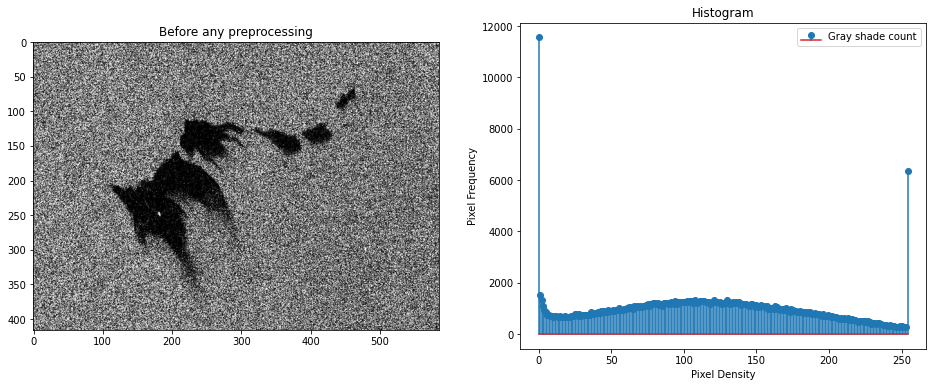

Image Resolution: 416 x 586


<Figure size 1800x1800 with 0 Axes>

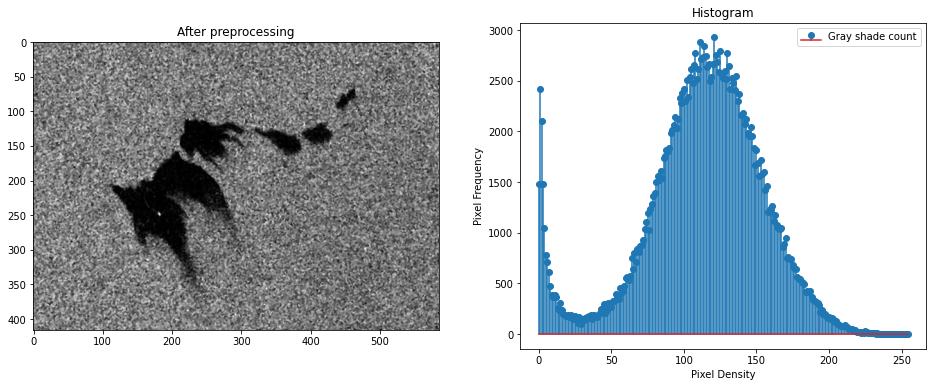

In [ ]:
img = sar1.copy()
imgCopy = sar1.copy()

# image preprocessing first

plotHistogram(img, img, "Before any preprocessing")
plt.show()

# image stats first
r, c = img.shape
print("Image Resolution:", r, "x", c)

# apply median filter to remove noise from the image's background
plt.figure(figsize=(25, 25))
final = cv2.medianBlur(img, 3)

plotHistogram(img, final, "After preprocessing")
plt.show()

img = final.copy()

In [ ]:
plt.figure(figsize=(20, 20))
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# thresholding with the T from above histogram
for i in range(r):
  for j in range(c):
    img[i, j] = 0 if img[i, j] > 40 else 255

<Figure size 1440x1440 with 0 Axes>

**Performing Opening Morphological Operation to get rid of any noise dots in the background**

(-0.5, 585.5, 415.5, -0.5)

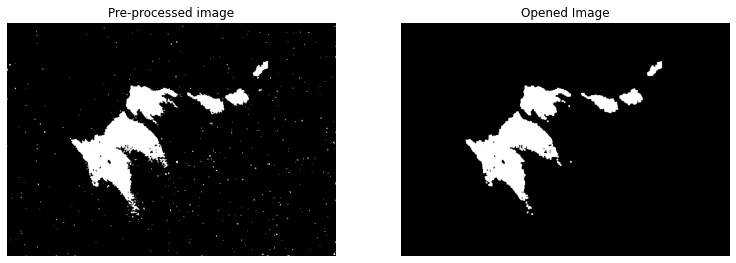

In [ ]:
plt.figure(figsize=(20, 20))

# erording image
erodedImage = cv2.erode(img, SE)

# then dilating image
openImage = cv2.dilate(erodedImage, SE)

plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title("Pre-processed image")
plt.axis("off")
plt.subplot(132)
plt.imshow(openImage, cmap="gray")
plt.title("Opened Image")
plt.axis("off")

**Identifying the edges of the oil spill to identify the actual spread rather than the region**

Text(0.5, 1.0, 'Horizontal edge detection')

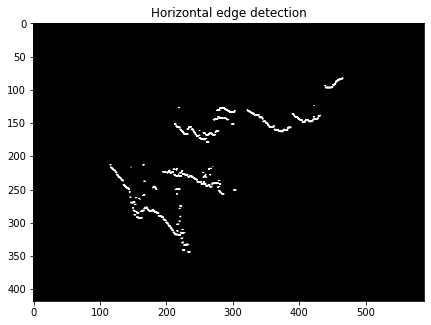

In [ ]:
#Detect horizontal edges using in built convolution function
mask = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
]

outputHorizontal = signal.convolve2d(openImage, mask)

# showing the output image after convolution
plt.figure(figsize=(7, 7))
plt.imshow(outputHorizontal, cmap="gray", vmin=0, vmax=255)
plt.title("Horizontal edge detection")

Text(0.5, 1.0, 'Vertical edge detection')

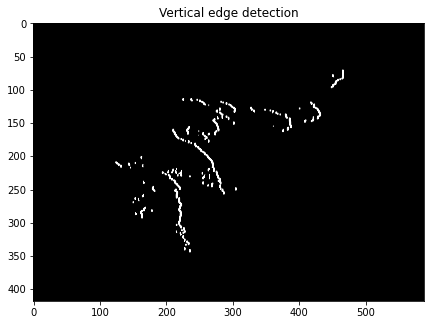

In [ ]:
#Detect vertical edges using inbuilt function for convolution
mask = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]

outputVertical = signal.convolve2d(openImage, mask)

# showing the output image after convolution
plt.figure(figsize=(7, 7))
plt.imshow(outputVertical, cmap="gray", vmin=0, vmax=255)
plt.title("Vertical edge detection")

(-0.5, 587.5, 417.5, -0.5)

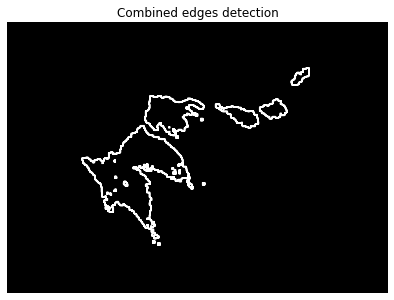

In [ ]:
# Detecting vertical and horizontal edges
G = np.absolute(outputVertical) + np.absolute(outputHorizontal)

# showing the output image after adding them
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(G, cmap="gray", vmin=0, vmax=255)
plt.title("Combined edges detection")
plt.axis("off")

Text(0.5, 1.0, 'Detected Oil Spill Edges')

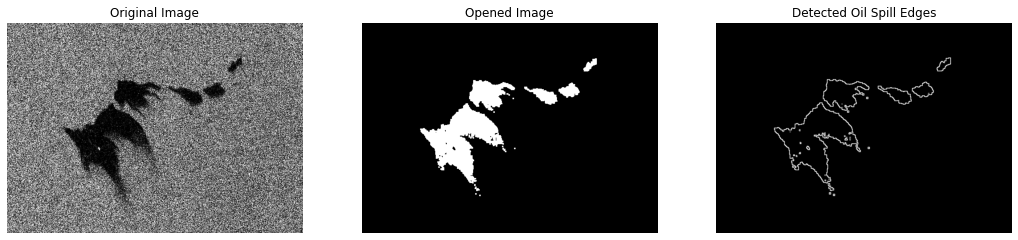

In [ ]:
# final comparison of the original and the gotten images
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(imgCopy, cmap="gray")
plt.axis("off")
plt.title("Original Image")
plt.subplot(132)
plt.imshow(openImage, cmap="gray")
plt.axis("off")
plt.title("Opened Image")
plt.subplot(133)
plt.imshow(G, cmap="gray")
plt.axis("off")
plt.title("Detected Oil Spill Edges")

## Performing same operations on 2nd SAR Image

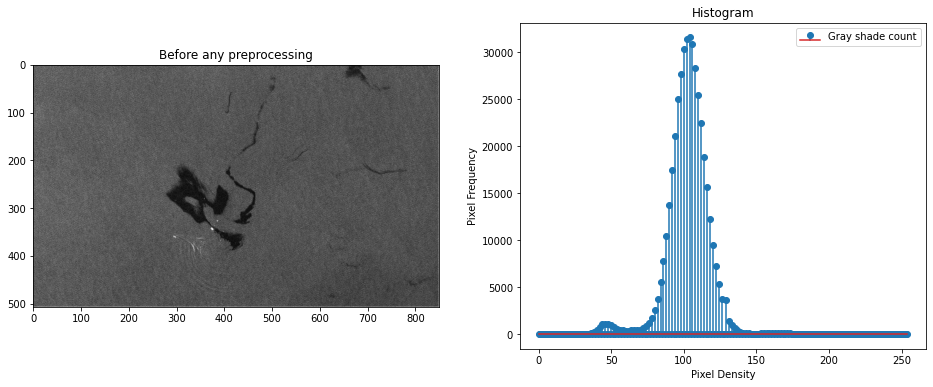

Image Resolution: 507 x 850


<Figure size 1800x1800 with 0 Axes>

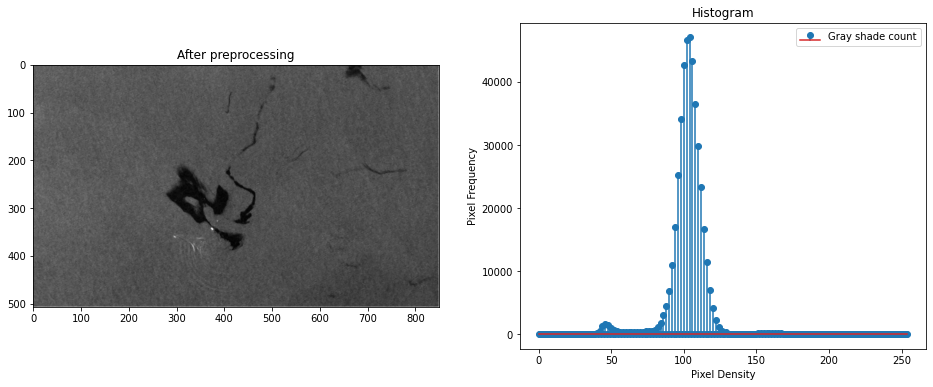

In [ ]:
img = sar2.copy()
imgCopy = sar2.copy()

# image preprocessing first

plotHistogram(img, img, "Before any preprocessing")
plt.show()

# image stats first
r, c = img.shape
print("Image Resolution:", r, "x", c)

# apply median filter to remove noise from the image
plt.figure(figsize=(25, 25))
final = cv2.medianBlur(img, 3)

plotHistogram(img, final, "After preprocessing")
plt.show()

img = final.copy()

**Selecting the proper threshold as the histogram shown above as 70**

In [ ]:
plt.figure(figsize=(20, 20))
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# thresholding
for i in range(r):
  for j in range(c):
    img[i, j] = 0 if img[i, j] > 70 else 255

<Figure size 1440x1440 with 0 Axes>

**Performing Opening Morphological Operation to get rid of any noise dots in the background**

(-0.5, 849.5, 506.5, -0.5)

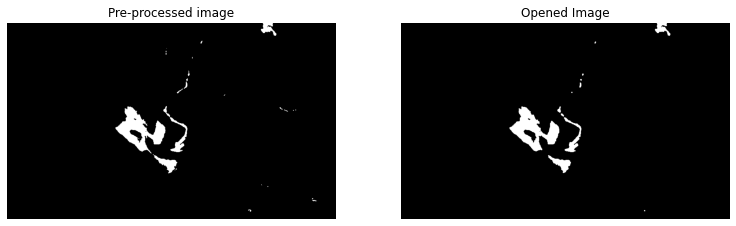

In [ ]:
plt.figure(figsize=(20, 20))

# erording image
erodedImage = cv2.erode(img, SE)

# then dilating image
openImage = cv2.dilate(erodedImage, SE)

plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title("Pre-processed image")
plt.axis("off")
plt.subplot(132)
plt.imshow(openImage, cmap="gray")
plt.title("Opened Image")
plt.axis("off")

**Identifying the edges of the oil spill to identify the actual spread rather than the region**

Text(0.5, 1.0, 'Horizontal edge detection')

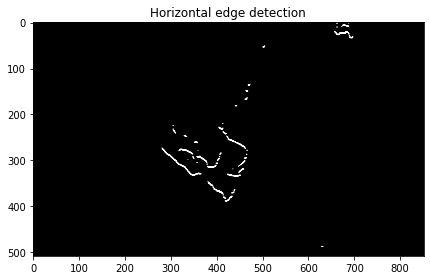

In [ ]:
#Detect horizontal edges using in built convolution function
mask = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
]

outputHorizontal = signal.convolve2d(openImage, mask)

# showing the output image after convolution
plt.figure(figsize=(7, 7))
plt.imshow(outputHorizontal, cmap="gray", vmin=0, vmax=255)
plt.title("Horizontal edge detection")

Text(0.5, 1.0, 'Vertical edge detection')

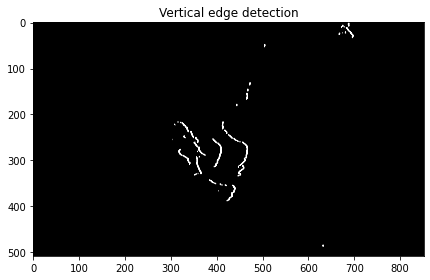

In [ ]:
#Detect vertical edges using inbuilt function for convolution
mask = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]

outputVertical = signal.convolve2d(openImage, mask)

# showing the output image after convolution
plt.figure(figsize=(7, 7))
plt.imshow(outputVertical, cmap="gray", vmin=0, vmax=255)
plt.title("Vertical edge detection")

(-0.5, 851.5, 508.5, -0.5)

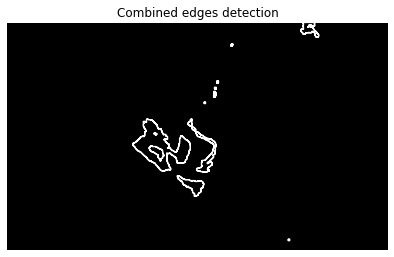

In [ ]:
# Detecting vertical and horizontal edges
G = np.absolute(outputVertical) + np.absolute(outputHorizontal)

# showing the output image after adding them
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(G, cmap="gray", vmin=0, vmax=255)
plt.title("Combined edges detection")
plt.axis("off")

Text(0.5, 1.0, 'Detected Oil Spill Edges')

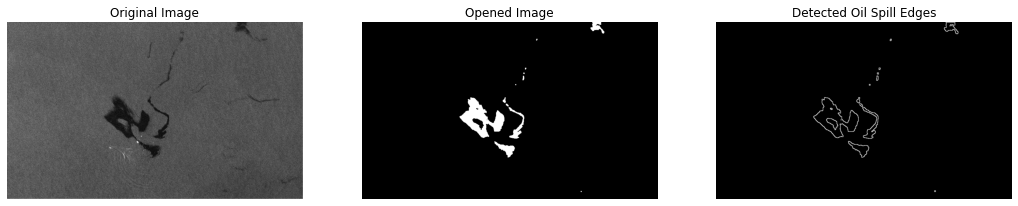

In [ ]:
# final comparison of the original and the gotten images
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(imgCopy, cmap="gray")
plt.axis("off")
plt.title("Original Image")
plt.subplot(132)
plt.imshow(openImage, cmap="gray")
plt.axis("off")
plt.title("Opened Image")
plt.subplot(133)
plt.imshow(G, cmap="gray")
plt.axis("off")
plt.title("Detected Oil Spill Edges")

# Working on SAR Images with low contrast

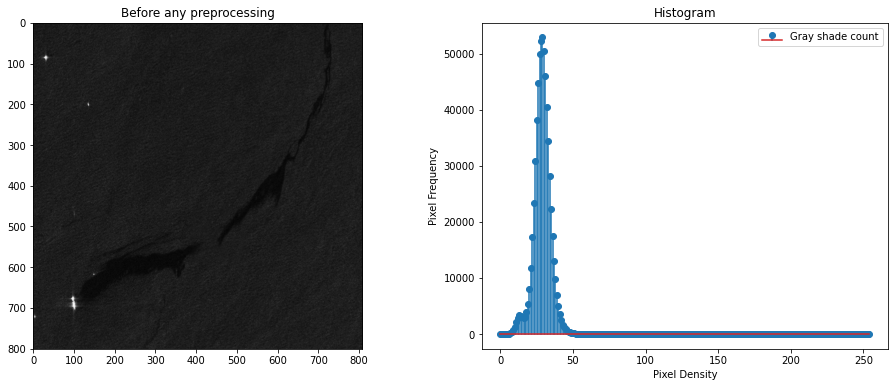

Image Resolution: 801 x 809


In [ ]:
img = sar3.copy()
imgCopy = sar3.copy()

# image preprocessing first

plotHistogram(img, img, "Before any preprocessing")
plt.show()

# image stats first
r, c = img.shape
print("Image Resolution:", r, "x", c)

### After plotting the histogram, we can see due to the low contrast of the image, we can barely see any spots visible (have to strain our eyes)

Solution: Histogram equalization

In [ ]:
count, value = np.histogram(img, 255, [0, 255])
cdf = count.cumsum() / count.sum()
eq = (cdf * 255).astype(int)

for i in range(r):
  for j in range(c):
    img[i, j] = eq[img[i, j]]

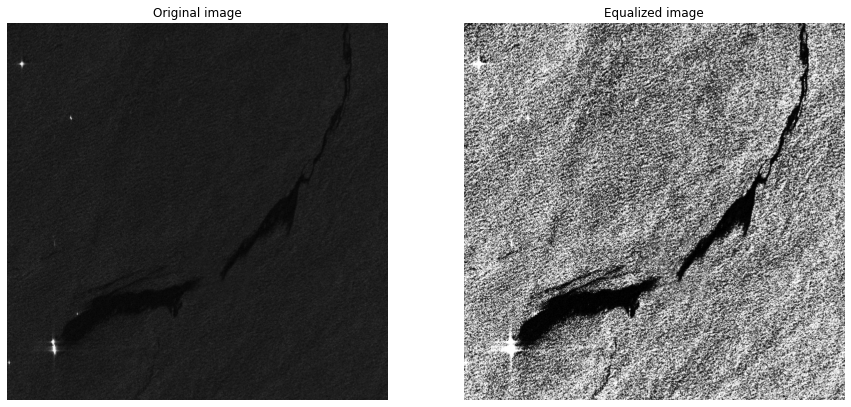

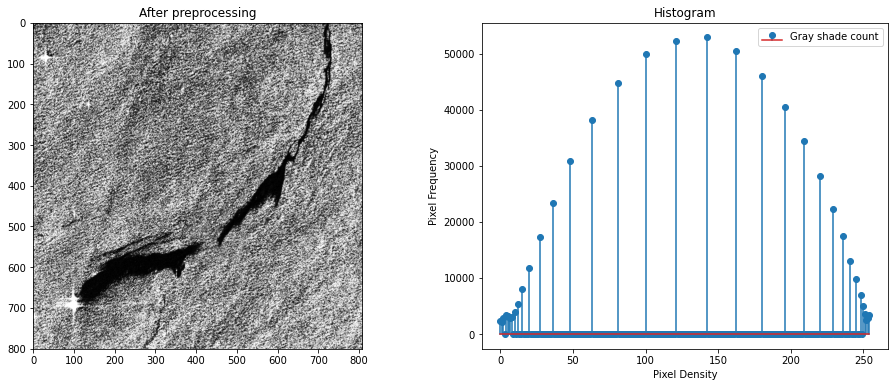

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
plt.imshow(imgCopy, cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Equalized image")
plt.show()

# plotting the new histogram of the equalized image
plotHistogram(img, img, "After preprocessing")
plt.show()

As you can see, our image has too many details visible. Since we don't have so much details in our image we'll try to reduce the background noise.

<Figure size 1800x1800 with 0 Axes>

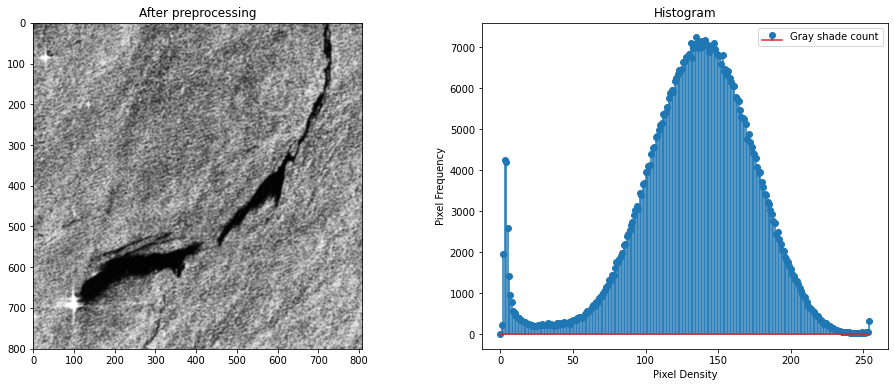

In [ ]:
# apply median filter to remove noise from the image
plt.figure(figsize=(25, 25))
final = cv2.blur(img, (5, 5))

plotHistogram(img, final, "After preprocessing")
plt.show()

img = final.copy()

<Figure size 1800x1800 with 0 Axes>

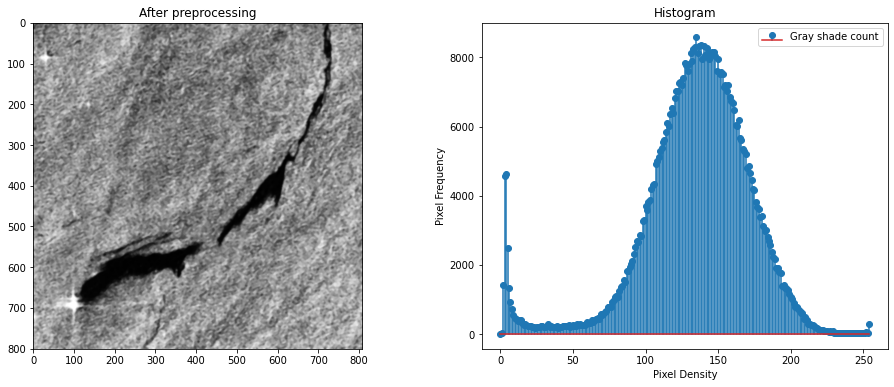

In [ ]:
# apply median filter to remove noise from the image
plt.figure(figsize=(25, 25))
final = cv2.medianBlur(img, 5)

plotHistogram(img, final, "After preprocessing")
plt.show()

**Selecting threshold as 40**

In [ ]:
plt.figure(figsize=(20, 20))
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# thresholding
for i in range(r):
  for j in range(c):
    img[i, j] = 0 if img[i, j] > 40 else 255

<Figure size 1440x1440 with 0 Axes>

(-0.5, 808.5, 800.5, -0.5)

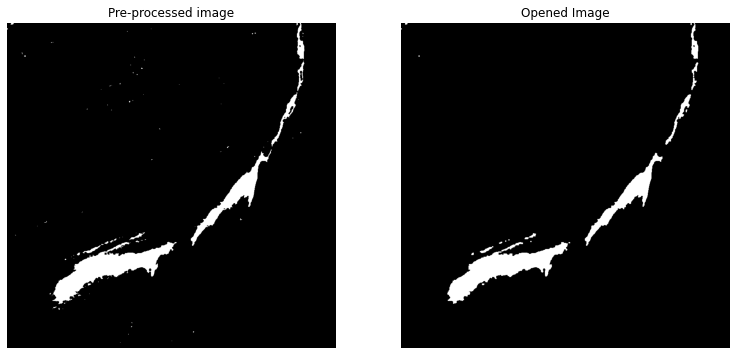

In [ ]:
plt.figure(figsize=(20, 20))

# erording image
erodedImage = cv2.erode(img, SE)

# then dilating image
openImage = cv2.dilate(erodedImage, SE)


plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title("Pre-processed image")
plt.axis("off")
plt.subplot(132)
plt.imshow(openImage, cmap="gray")
plt.title("Opened Image")
plt.axis("off")

Detecting the edges and the boundary of the affected region due to Oil Spill

Text(0.5, 1.0, 'Horizontal edge detection')

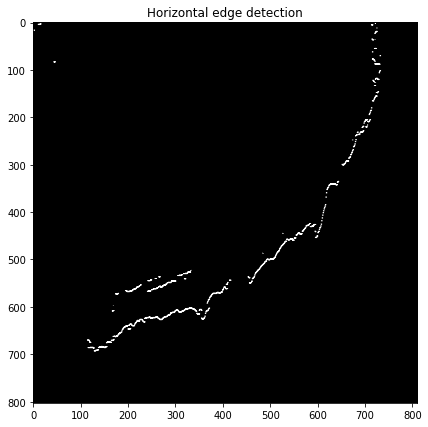

In [ ]:
#Detect horizontal edges using in built convolution function
mask = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
]

outputHorizontal = signal.convolve2d(openImage, mask)

# showing the output image after convolution
plt.figure(figsize=(7, 7))
plt.imshow(outputHorizontal, cmap="gray", vmin=0, vmax=255)
plt.title("Horizontal edge detection")

Text(0.5, 1.0, 'Vertical edge detection')

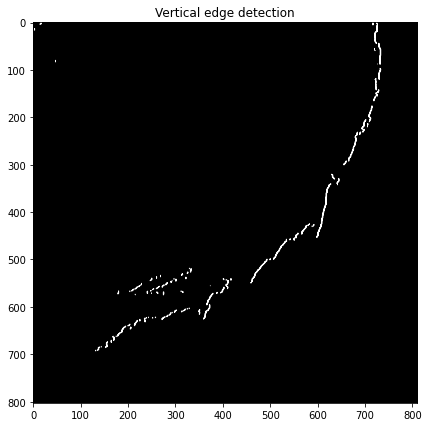

In [ ]:
#Detect vertical edges using inbuilt function for convolution
mask = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]

outputVertical = signal.convolve2d(openImage, mask)

# showing the output image after convolution
plt.figure(figsize=(7, 7))
plt.imshow(outputVertical, cmap="gray", vmin=0, vmax=255)
plt.title("Vertical edge detection")

(-0.5, 810.5, 802.5, -0.5)

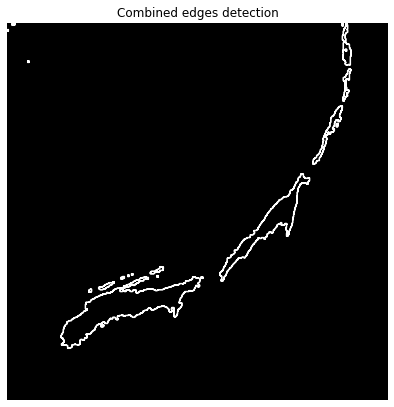

In [ ]:
# Detecting vertical and horizontal edges
G = np.absolute(outputVertical) + np.absolute(outputHorizontal)

# showing the output image after adding them
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(G, cmap="gray", vmin=0, vmax=255)
plt.title("Combined edges detection")
plt.axis("off")

Text(0.5, 1.0, 'Detected Oil Spill Edges')

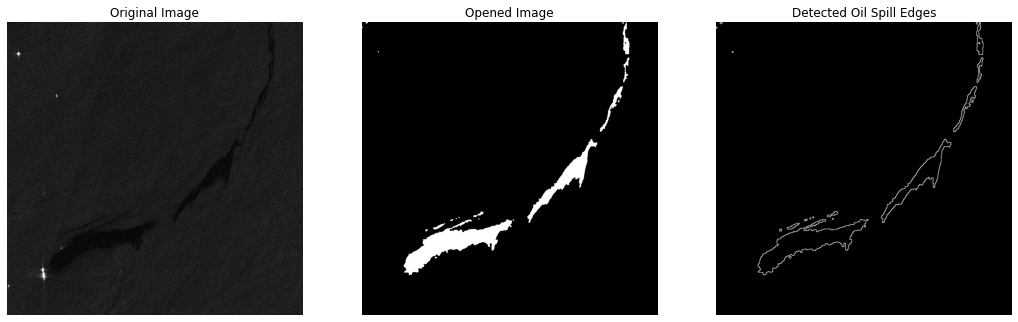

In [ ]:
# final comparison of the original and the gotten images
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(imgCopy, cmap="gray")
plt.axis("off")
plt.title("Original Image")
plt.subplot(132)
plt.imshow(openImage, cmap="gray")
plt.axis("off")
plt.title("Opened Image")
plt.subplot(133)
plt.imshow(G, cmap="gray")
plt.axis("off")
plt.title("Detected Oil Spill Edges")